In [ ]:
import tensorflow as tf
tf.__version__

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils


import keras
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[0]

5

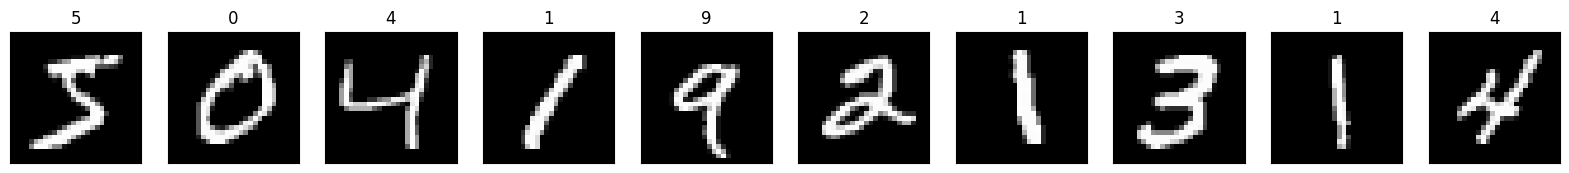

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


set_visible(False) -> We will not able to see axis values the whole grid  thing not be able to see .

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

num_classes = 10

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

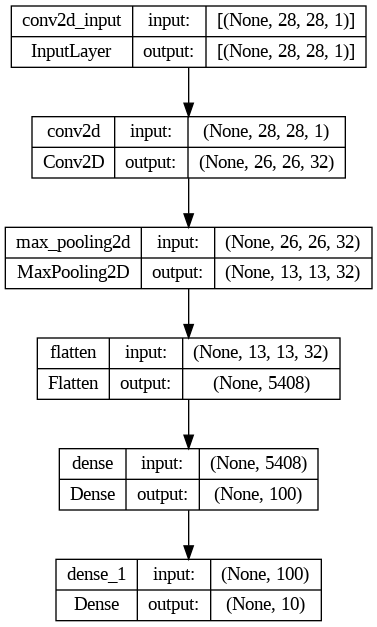

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1360 - accuracy: 0.9598 - val_loss: 0.0599 - val_accuracy: 0.9805
Epoch 2/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0471 - val_accuracy: 0.9847


In [ ]:
model.save('mnist_cnn_model.h7')

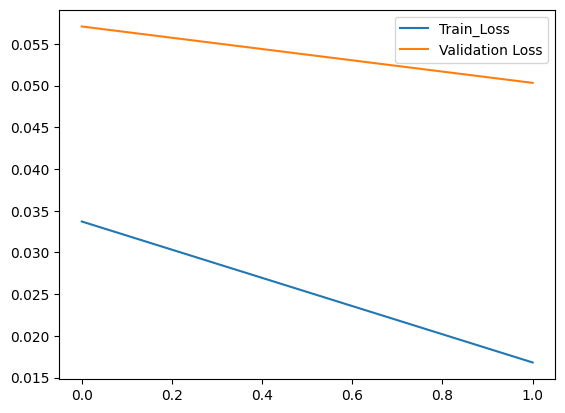

In [ ]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

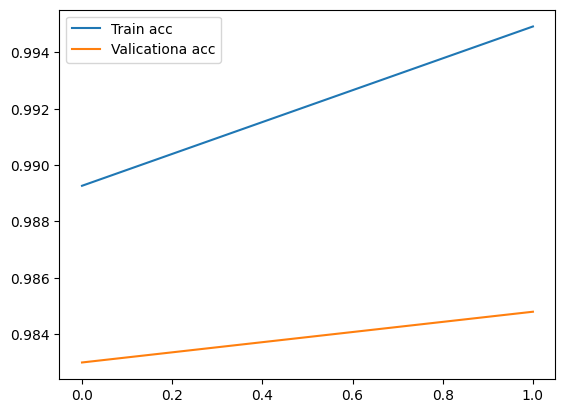

In [ ]:
plt.plot(model.history.history['accuracy'],label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Valicationa acc')
plt.legend()

In [ ]:
model=keras.models.load_model('mnist_cnn_model.h7')

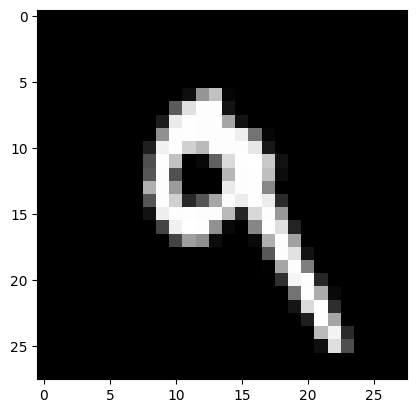

In [ ]:
plt.imshow(x_test[7],cmap='gray')

In [ ]:
x=np.reshape(x_test[2],(1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 106ms/step


1